# Parks by Neighborhood

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [2]:
# import dataset of data dictionary
data_dict = pd.read_csv("Parks-Data-Dictionary.csv")
display(data_dict)

,id,type
0,id,text
1,name,text
2,type,text
3,maintenance_responsibility,text
4,image,text
5,neighborhood,text
6,council_district,text
7,ward,text
8,tract,text
9,public_works_division,text


In [39]:
# import dataset of parks
parks = pd.read_csv("Parks.csv")
parks_hoods = {}
for index, row in parks.iterrows():
    if row["neighborhood"] not in parks_hoods.keys():
        parks_hoods[row["neighborhood"]] = 1
    else:
        parks_hoods[row["neighborhood"]] = parks_hoods[row["neighborhood"]] + 1
parks_byHood = pd.DataFrame()
parks_byHood["Neighborhood"] = list(parks_hoods.keys())
parks_byHood["Total"] = list(parks_hoods.values())
parks_byHood.sort_values(by=["Total"], ascending=False)

,Neighborhood,Total
6,East Liberty,12
4,Central Business District,10
0,Beechview,8
8,South Side Slopes,7
34,Point Breeze,7
...,...,...
47,Hays,1
28,Arlington,1
29,Stanton Heights,1
51,Morningside,1


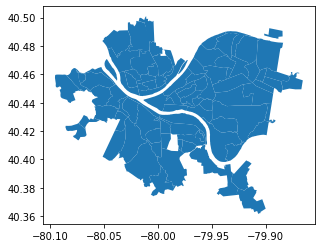

In [40]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [41]:
# do the merge
parks_map = neighborhoods.merge(parks_byHood, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','Total','geometry']].head()

,hood,Total,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


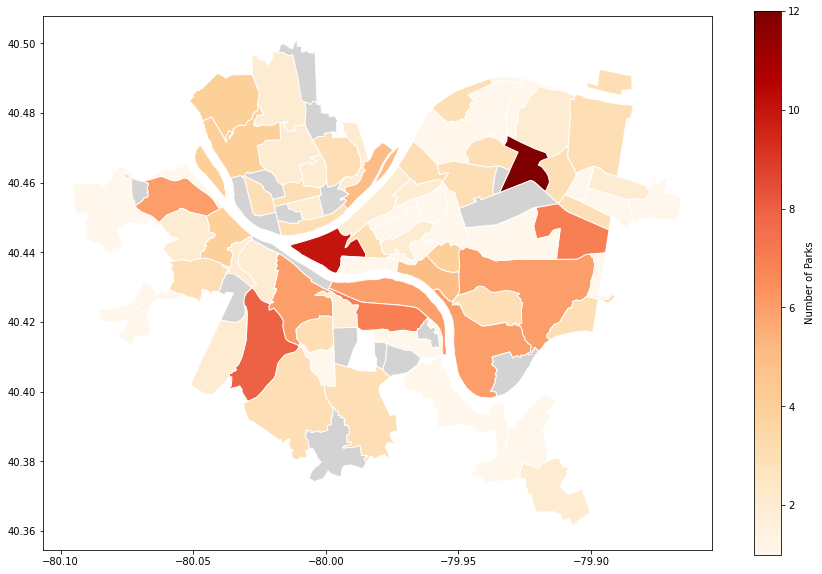

In [43]:
parks_map.plot(column='Total', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )